# Clustering

In this notebook we will be going over how to use clustering in machine learning. Specifically we will be focusing on K-Means clustering through SciKit-Learn and Principle Component Analysis (PCA) for visualizing data in high dimensions. Clustering is a technique that 'clusters' data points that are similar to each other. This is often used for pattern recognition, data visualization, and outlier detection. This is a very useful technique to know for machine learning and data science as most datasets are often too high of a dimensionality for humans to easily visualize. 

#### Video

https://www.youtube.com/watch?v=7JRb8G29g-Y&list=PLL0SWcFqypCl4lrzk1dMWwTUrzQZFt7y0&index=23 (Clustering)

# K-Means Clustering

K-Means is a particularily popular clustering choice due to its simplicity and efficiency. It organizes the data points into clusters by minimizing the variance within each cluster. This often leads to easy identification of distinct groupings within a dataset. K-Means is a great choice when dealing with low dimensional numerical datasets containing low noise, well separated clusters.

To start off we will import libraries and create some synthetic code to work with. The make_blobs generates some clustered data.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X, _ = make_blobs(n_samples=300, centers=4, n_features=2, cluster_std=1.0, random_state=42)

Next we will standaradize our data. This makes the clustering significantly better as it causes all the data points to be on the same numerical scale. 

In [68]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Next we will apply kmeans clustering. When running kmeans clustering it's important to specify the number of clusters that you want the KMeans model to sort the data into. This is something that is important to get right as it can improve how well the clustering can be interpreted.

After we've found a good number of clusters we can use kmeans to group the data and plot it.

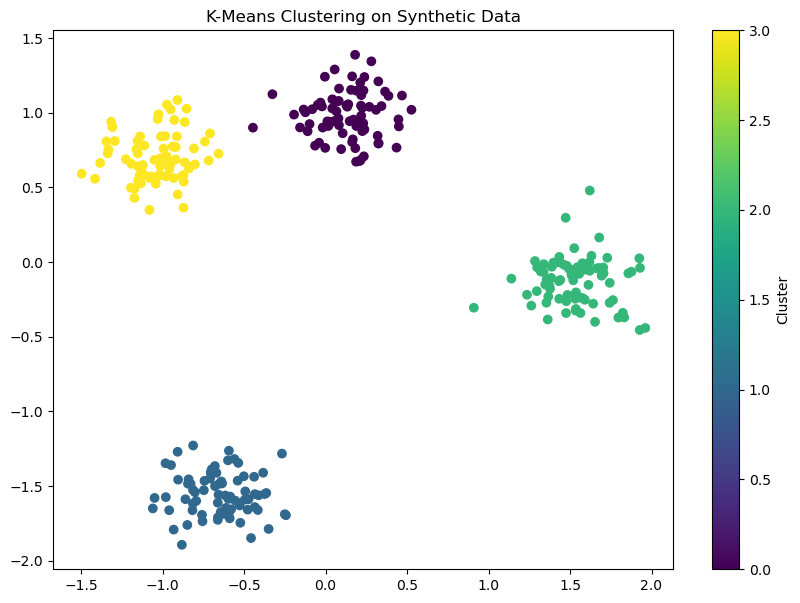

In [69]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters in the 2D PCA space
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering on Synthetic Data')
plt.colorbar(label='Cluster')
plt.show()

We visually can see here that the silhouette score did a good job at finding the number of clusters that we should aim for. However, when dealing with higher dimensionality data this may not be as accurate. 

# Principal Component Analysis (PCA)

PCA reduces the dimensionality of the data while preserving as much variance as possible. This helps provide meaningful visualization and analysis of the clustered results. K-Means and PCA can be used together to cluster high dimensionality data. PCA is something to keep in mind if you need to visualize high dimensional data, it's very helpful. 

We will use the PCA tool from scikit-learn. When we generate the samples this time we will set the n_features to 10. This means that the data we are generating has 10 dimensions rather than the 2 from before. Furthermore, we will give the data 5 clustering centers. The next steps for kmeans clustering are the same from above. 

In [83]:
from sklearn.decomposition import PCA

# Generate synthetic 10-dimensional dataset
X, _ = make_blobs(n_samples=300, centers=5, n_features=10, cluster_std=1.0, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)



Now we will use PCA to reduce the dimensionality of the data. The n_components parameter controls how low we want to reduce the dimensions. First you define the PCA then you can apply the transformation to the **scaled** data. 

In [95]:
# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Apply the PCA transformation here

When we plot the clusters with PCA it's important to remember that you lose specificity of the axis.

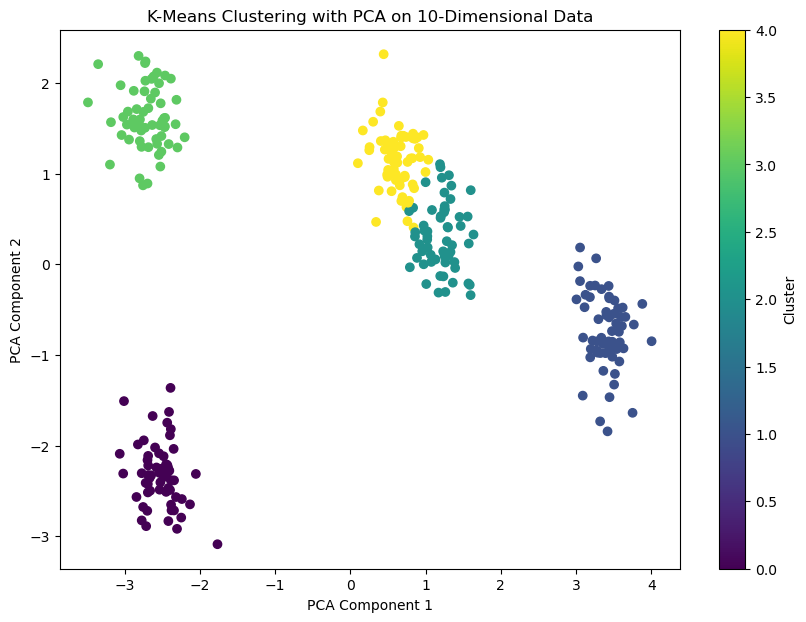

In [100]:
# Plot the clusters in the 2D PCA space
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA on 10-Dimensional Data')
plt.colorbar(label='Cluster')
plt.show()

# add
download metals vs insulators from sparks, take out 10% and keep the labels for those, delete the labels for the other par t

featurize cbfv 

cluster and embed to low dimensions 

predict labels for the 10% w/o labels and put them on the clustering